# USDA Crop Dataset Tutorial

## Overview

The USDA Crop Dataset, collected from the [USDA Quick Statistic website](https://quickstats.nass.usda.gov/), offers valuable information, such as production, yield, etc., for crops grown in the United States continent. It offers crop information for four types of crops, i.e., **corn**, **cotton**, **soybeans**, and **winter wheat**, at a county-level basis,
with the data covering 2291 U.S. counties for 6 years (2017-2022).
The geographic distribution for the USDA Crop Dataset is illustrated below,
with the rightmost bar chart presenting the number of counties for different crop types.

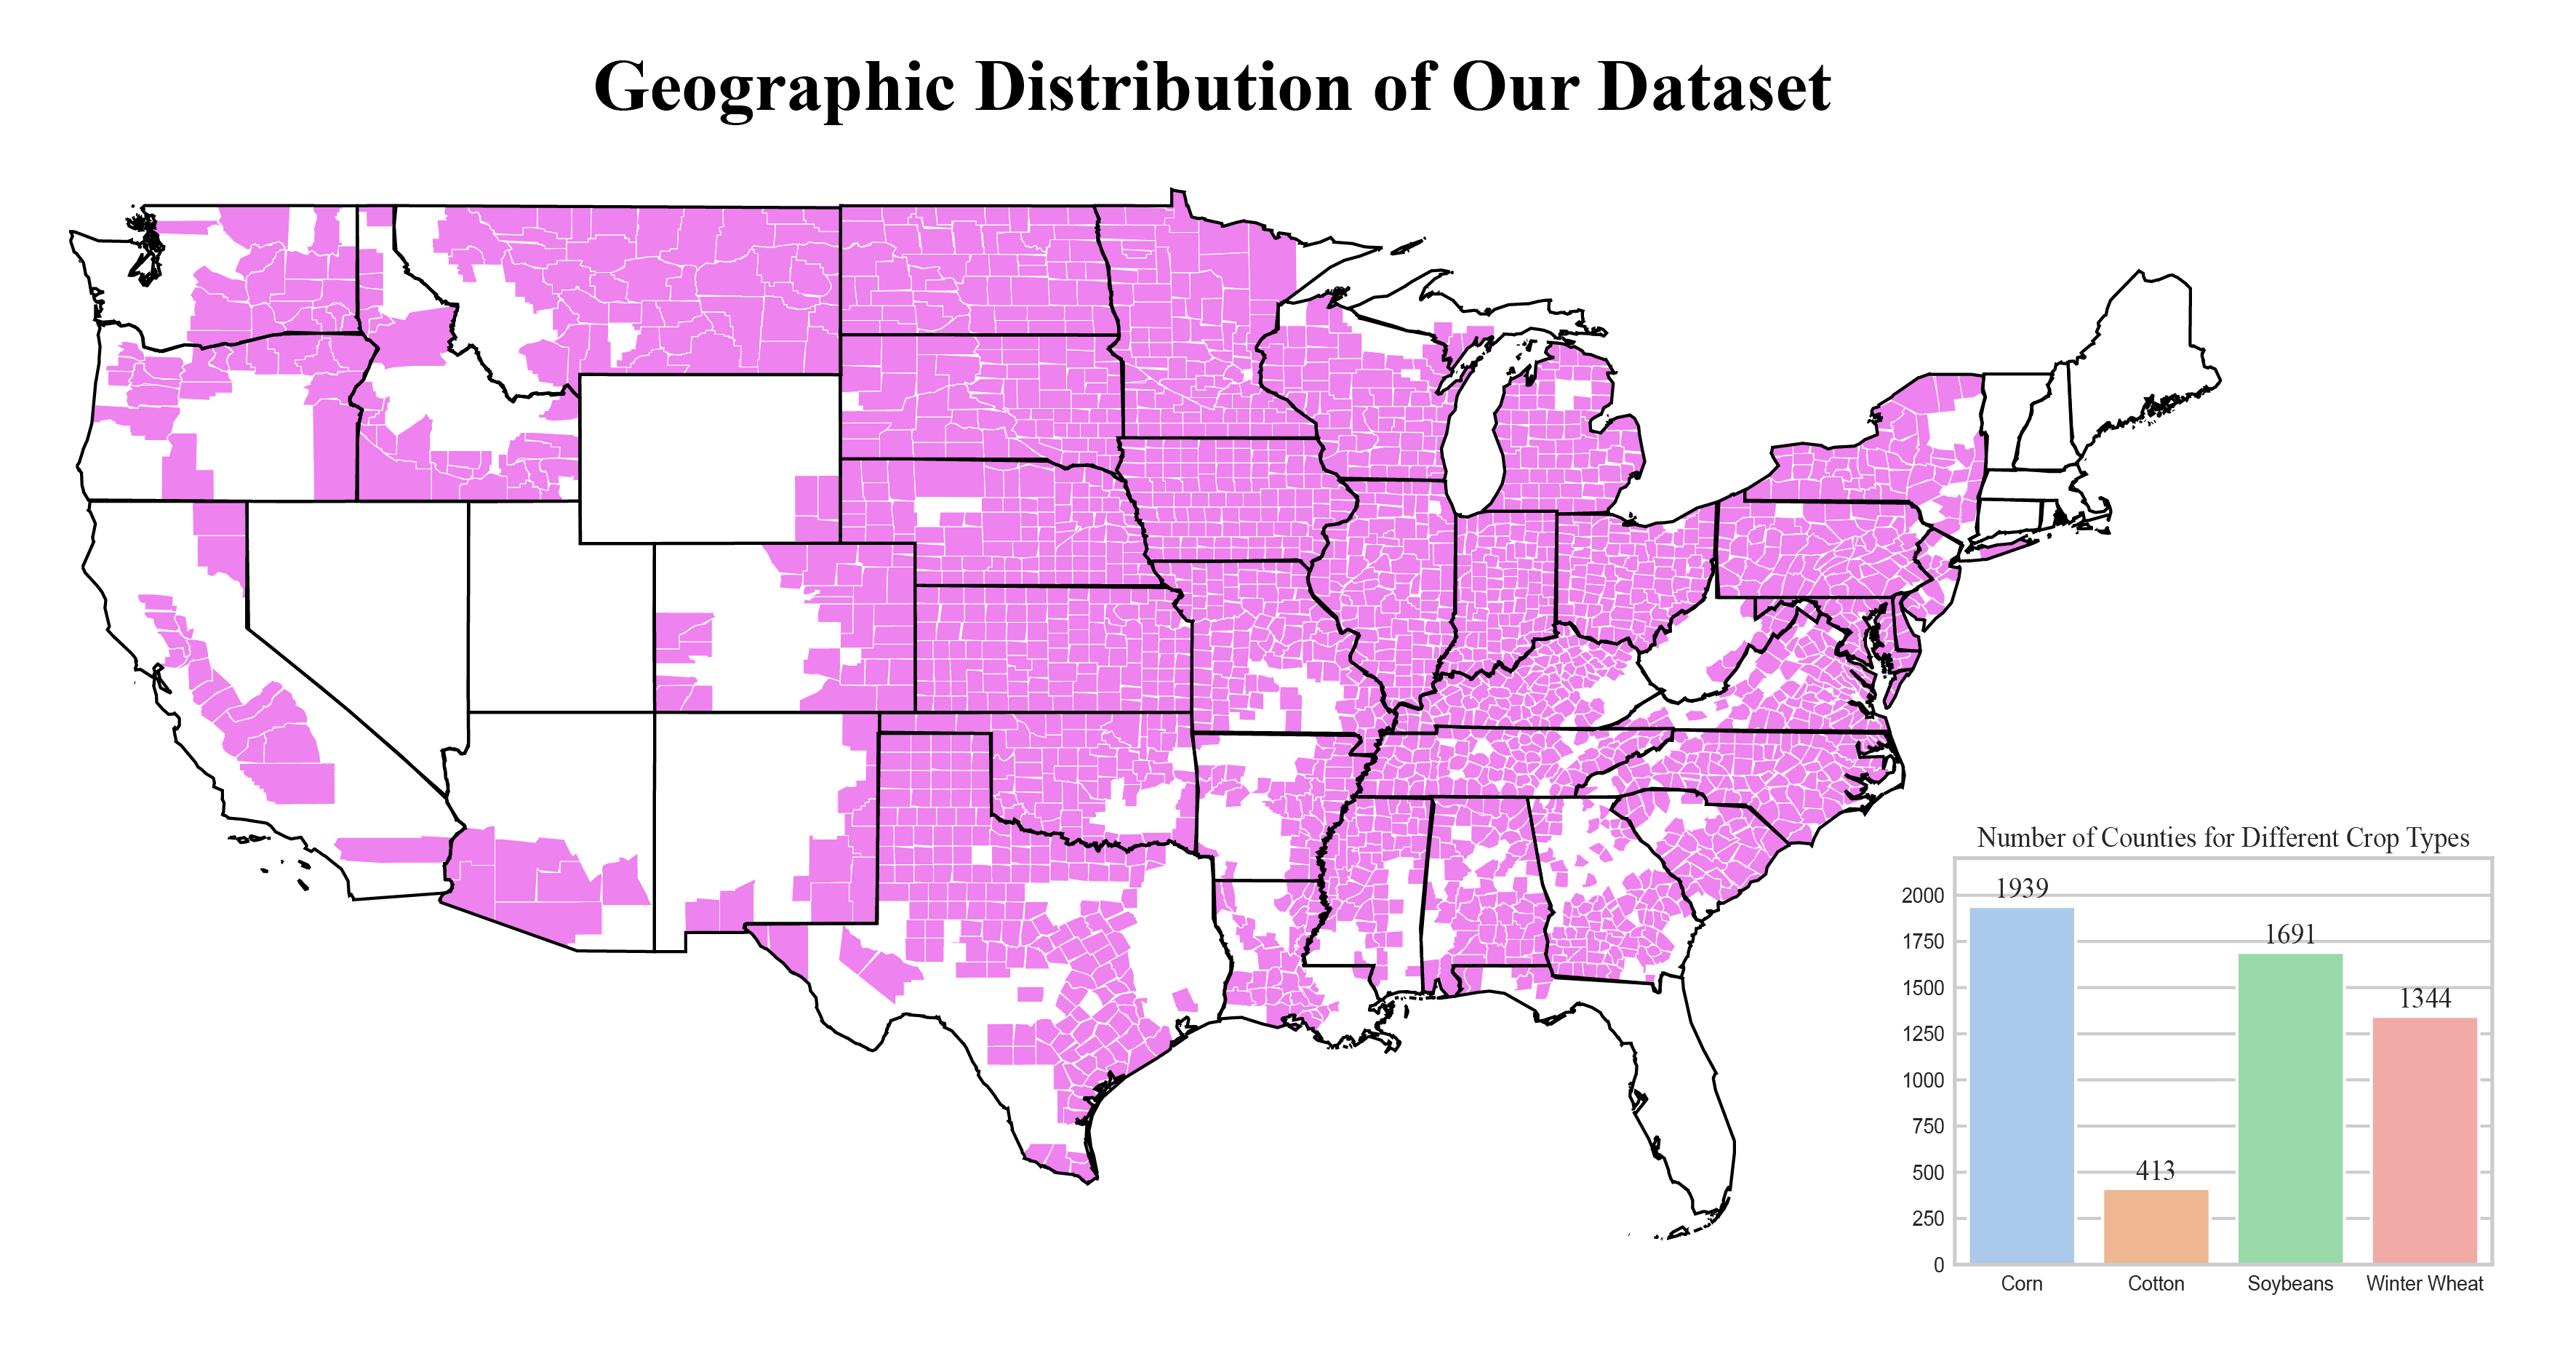

## Data Files

The directory structure is under the following format:
- `CropNet/USDA/data/<year>/<crop>/<year>/<file_name>`
- e.g., `CropNet/USDA/data/2022/Corn/USDA_Corn_County_2022.csv`

The file name is formatted as below:

- `USDA_<crop>_County_<year>.csv`
- e.g., `USDA_Corn_County_2022.csv`

## Data Format

Details of column names and their description are listed below.


| Column Name                  | Description                                                  |
| ---------------------------- | ------------------------------------------------------------ |
| commodity_desc               | The crop type, i.e., CORN, COTTON, SOYBEANS, or WHEAT        |
| year                         | Year of the crop information, i.e., 2017, 2018, ..., or 2022 |
| state_ansi                   | The unique code for a U.S. state, e.g.,  "01" for Alabama (AL) |
| state_name                   | The U.S. state name, e.g., ALABAMA                           |
| county_ansi                  | The unique code for a U.S. county, e.g., "003" for Baldwin County, AL |
| county_name                  | The U.S. county name, e.g., BALDWIN                          |
| asd_code                     | Agricultural Statistics District code                        |
| asd_desc                     | Agricultural Statistics District description                 |
| domain_desc                  | How much area was covered, e.g., TOTAL                       |
| source_desc                  | Description of where the data was sourced, e.g., SURVEY      |
| agg_level_desc               | Description of the region covered, i.e., COUNTY              |
| PRODUCTION, MEASURED IN BU   | The annual production information. Notably, the column name for the cotton is `PRODUCTION, MEASURED IN 480 LB BALES` |
| YIELD, MEASURED IN BU / ACRE | The annual yield information. Notably, the column name for the cotton is `YIELD, MEASURED IN BU / ACRE`. |

## Accessing USDA Crop Dataset Data
1. Go to the Google Drive [here](https://drive.google.com/drive/folders/1Js98GAxf1LeAUTxP1JMZZIrKvyJStDgz) and download the `USDA Crop Dataset.zip`
2. Extract the zip file and move it to an appropriate directory, e.g., /mnt/data/CropNet
3. To access the USDA data, change the `base_path` below to the directory where you stored the USDA data
4. Change the `file_path` below to the particular path you want to visualize

## Examples for USDA Crop Dataset

### Example 1: Reading the Data via panda

In [ ]:
import os
import pandas as pd
import numpy as np
import plotly.figure_factory as ff

# base path for where the USDA information has been stored
base_path = "/content/drive/MyDrive/CropNet_Tutorials/input/"
# file path for accessing a particular file
file_path = "USDA/data/Soybeans/2022/USDA_Soybean_County_2022.csv"

path = os.path.join(base_path, file_path)
df = pd.read_csv(path)

df.head()

,commodity_desc,reference_period_desc,year,state_ansi,state_name,county_ansi,county_name,asd_code,asd_desc,domain_desc,source_desc,agg_level_desc,"PRODUCTION, MEASURED IN BU","YIELD, MEASURED IN BU / ACRE"
0,SOYBEANS,YEAR,2022,1,ALABAMA,3,BALDWIN,50,COASTAL PLAINS & GULF COAST,TOTAL,SURVEY,COUNTY,445000.0,37.1
1,SOYBEANS,YEAR,2022,1,ALABAMA,9,BLOUNT,20,MOUNTAINS & EASTERN VALLEY,TOTAL,SURVEY,COUNTY,96900.0,37.4
2,SOYBEANS,YEAR,2022,1,ALABAMA,15,CALHOUN,20,MOUNTAINS & EASTERN VALLEY,TOTAL,SURVEY,COUNTY,132000.0,45.5
3,SOYBEANS,YEAR,2022,1,ALABAMA,19,CHEROKEE,20,MOUNTAINS & EASTERN VALLEY,TOTAL,SURVEY,COUNTY,237000.0,39.2
4,SOYBEANS,YEAR,2022,1,ALABAMA,33,COLBERT,10,NORTHERN VALLEY,TOTAL,SURVEY,COUNTY,801000.0,35.6


### Example 2: Visualizing 2022 Crop Yields across the United States
1. Go to where you stored the CropNet GitHub clone.
2. Copy the path to the `input` folder you see.
3. Save that path to `data_path` below for use in plotting.

In [ ]:
# path to the input folder on GitHub (change to yours)
data_path = "/content/drive/MyDrive/CropNet_Tutorials/input/"

In [ ]:
!pip install plotly-geo==1.0.0
!pip install geopandas==0.8.1
!pip install pyshp==1.2.10
!pip install shapely==1.6.3
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def get_fips_crop(data_path, crop):
    """Function to get an array of fips codes of the counties having particular crop info.

    Parameters
    ----------
    data_path: (String) path to the data folder on the CropNet GitHub
    crop: (String) the crop

    Returns
    ----------
    (String array) an array of fips codes that has that particular crop's data
    """
    if crop == 'Cotton':
        url = base_path + 'USDA/stats/cotton_counties.csv'
    elif crop == 'Corn':
        url = base_path + 'USDA/stats/corn_counties.csv'
    elif crop == 'Soybeans':
        url = base_path + 'USDA/stats/soybeans_counties.csv'
    elif crop == 'WinterWheat':
        url = base_path + 'USDA/stats/winter_wheat_counties.csv'

    df_relevant_fips = pd.read_csv(url)
    states_fips = np.asarray(df_relevant_fips['state_ansi'].values)
    states_fips = [int(val) for val in states_fips]
    for i in range(len(states_fips)):
        states_fips[i] = str(states_fips[i]).zfill(2)

    counties_fips = np.asarray(df_relevant_fips['county_ansi'].values)
    counties_fips = [int(val) for val in counties_fips]
    for i in range(len(counties_fips)):
        counties_fips[i] = str(counties_fips[i]).zfill(3)

    fips = []
    for i in range(len(states_fips)):
        fips.append(states_fips[i] + counties_fips[i])

    return fips

In [ ]:
def plot_map(data_path, crop, unit):
    """Function to plot the counties that have crop data and to observe their yield or production amount.

    Parameters
    ----------
    data_path: (String) path to the data folder on the CropNet GitHub
    crop: (String) the crop (Options: ['Cotton', 'Corn', 'Soybeans', 'WinterWheat'])
    unit: (String) yield or production (Options: ['Yield', 'Production'])

    Returns
    ----------
    None
    """

    # get the fips codes
    fips = get_fips_crop(data_path, crop)

    # get the correct info depending on crop and unit

    # file containing the crop information
    file = ''
    # colors for the map and displayed on the legend
    colorscale = ''
    # endpoints for the legend
    endpts = []
    # column where the appropriate data can be found
    columns = ''

    if crop == 'Cotton':
        file = 'cotton_counties.csv'
        colorscale = ["#ACB0E2", "#7B68EE", "#6600CC", "#330066"]
        if unit == 'Yield':
            title = 'USDA Crop Dataset: 2022 Cotton Yield'
            legend_title = 'Yield in LB/ACRE'
            endpts = [500, 1_000, 1_500]
            columns = 'YIELD, MEASURED IN LB / ACRE'
        else:
            title = 'USDA Crop Dataset: 2022 Cotton Production'
            legend_title = 'Production in 480 LB Bales'
            endpts = [30_000, 60_000, 90_000]
            columns = 'PRODUCTION, MEASURED IN 480 LB BALES'
    elif crop == 'Corn':
        file = 'corn_counties.csv'
        colorscale = ["#b3d2e9", "#85bcdb", "#2171b5", "#08306b"]
        if unit == 'Yield':
            title = 'USDA Crop Dataset: 2022 Corn Yield'
            legend_title = 'Yield in BU/ACRE'
            endpts = [80, 160, 240]
            columns = 'YIELD, MEASURED IN BU / ACRE'
        else:
            title = 'USDA Crop Dataset: 2022 Corn Production'
            legend_title = 'Production in BU'
            endpts = [6_000_000, 12_000_000, 18_000_000]
            columns = 'PRODUCTION, MEASURED IN BU'
    elif crop == 'Soybeans':
        file = 'soybeans_counties.csv'
        colorscale = ["#CCFFCC", "#69E557", "#4C9900", "#003300"]
        if unit == 'Yield':
            title = 'USDA Crop Dataset: 2022 Soybean Yield'
            legend_title = 'Yield in BU/ACRE'
            endpts = [20, 40, 60]
            columns = 'YIELD, MEASURED IN BU / ACRE'
        else:
            title = 'USDA Crop Dataset: 2022 Soybean Production'
            legend_title = 'Production in BU'
            endpts = [2_000_000, 4_000_000, 6_000_000]
            columns = 'PRODUCTION, MEASURED IN BU'
    elif crop == 'WinterWheat':
        file = 'winter_wheat_counties.csv'
        colorscale = ["#FFCCCC", "#FF6666", "#CC0000", "#660000"]
        if unit == 'Yield':
            title = 'USDA Crop Dataset: 2022 Winter Wheat Yield'
            legend_title = 'Yield in LB/ACRE'
            endpts = [20, 40, 60]
            columns = 'YIELD, MEASURED IN BU / ACRE'
        else:
            title = 'USDA Crop Dataset: 2022 Winter Wheat Production'
            legend_title = 'Production in BU'
            endpts = [300_000, 600_000, 900_000]
            columns = 'PRODUCTION, MEASURED IN BU'

    # pandas DataFrame with all the crop data
    df = pd.read_csv(data_path + 'USDA/stats/' + file)

    # crop yield or production values
    values = df[columns].values

    # creating the map
    fig = ff.create_choropleth(fips=fips, values=values,
                              state_outline={'color': 'rgb(0,0,0)', 'width': 1},
                              county_outline={'color': 'rgb(255,255,255)', 'width': 0.25},
                              binning_endpoints=endpts,
                              title=title, round_legend_values=True,
                              show_state_data=True, simplify_county=0, simplify_state=0,
                              colorscale=colorscale, legend_title=legend_title)
    fig.layout.template = None

    # showing the map
    fig.show()

In [ ]:
# plotting Corn Yield Data for 2022
plot_map(data_path, 'Corn', 'Yield')

Output hidden; open in https://colab.research.google.com to view.

### Example 3: Visualizing 2022 Crop Production across the United States

In [ ]:
# plotting Soybean Production Data for 2022
plot_map(data_path, 'Soybeans', 'Production')

Output hidden; open in https://colab.research.google.com to view.

### Example 4: Visualizing 2022 Crop Yields for One State

In [ ]:
# Michigan winter wheat yield

# get all the fips codes for winter wheat
fips_wheat = get_fips_crop(data_path + 'USDA/stats/winter_wheat_counties.csv', 'WinterWheat')

# keep fips codes that pertain to Michigan
fips_wheat = [fips for fips in fips_wheat if fips.startswith('26')]

# read in all the data for winter wheat
df_wheat = pd.read_csv(data_path + 'USDA/stats/winter_wheat_counties.csv')

# only keep data pertaining to Michigan
df_wheat = df_wheat.loc[df_wheat['state_ansi'] == 26]

# get the yield values
values_wheat = df_wheat['YIELD, MEASURED IN BU / ACRE'].values

# set the colorscale (gold)
colorscale = ["#EEE8AA", "#D4AF37", "#FF8C00", "#A0522D"]

# set the endpoints
endpts = [60, 70, 80]

# create the map
fig = ff.create_choropleth(fips=fips_wheat, values=values_wheat,
                          state_outline={'color': 'rgb(0,0,0)', 'width': 1},
                          county_outline={'color': 'rgb(255,255,255)', 'width': 0.25},
                          binning_endpoints=endpts, scope=['MI'],
                          title='USDA Crop Dataset: 2022 Michigan Winter Wheat Yield', round_legend_values=True,
                          show_state_data=True, simplify_county=0, simplify_state=0,
                          colorscale=colorscale, legend_title='Yield in BU/ACRE')
fig.layout.template = None

# display the map
fig.show()

### Example 5: Visualizing One County's Data from 2017 to 2022

In [ ]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# grabbing data from a high corn yield county (Champaign, Illinois)
# and a low corn yield county (Washington County, Colorado)
df_champaign_illinois = pd.read_csv(data_path + 'USDA/stats/champaign_illinois.csv')
df_washington_colorado = pd.read_csv(data_path + 'USDA/stats/washington_colorado.csv')

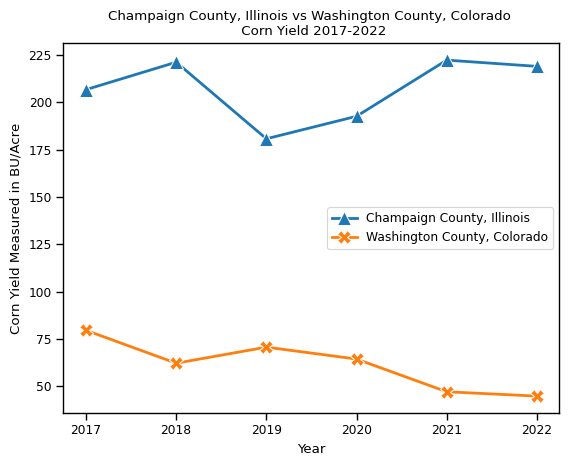

In [ ]:
# plotting the counties' data against each other
paper_rc = {'lines.linewidth': 2, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

chart = sns.lineplot(data=df_champaign_illinois, x="year", y="YIELD, MEASURED IN BU / ACRE", label='Champaign County, Illinois', marker='^')
chart.set(title="Champaign County, Illinois vs Washington County, Colorado \n Corn Yield 2017-2022")
chart.set_xlabel('Year')
chart.set_ylabel('Corn Yield Measured in BU/Acre')
sns.lineplot(data=df_washington_colorado, x="year", y="YIELD, MEASURED IN BU / ACRE", label='Washington County, Colorado', marker='X')

plt.legend(loc='center right')